# MNISTClustering 
Le clustering ou regroupement automatique permet de trouver des structures de groupes dans les données. Ce notebook présente différents algorithmes en utilisant le jeu de données très classique MNIST. Ce jeux de données contient des chiffre manuscrit numérisés sous forme d'images de 8 pixels par 8 pixels. Nous allons mettre en oeuvre les trois algorithme de clustering vue en cours sur ce jeux de données grâce à la libraririe scikit-learn. Et nous visualiserons très rapidement les résultats obtenus. Nous allons commencer en chargeant les librairies dont nous avons besoin et en chargeant le jeu de données.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score,pairwise_distances

%matplotlib inline
np.random.seed(42)

# recuperation des données déjà mise en forme
digits = load_digits()

# centrage reduction des données stokées dans digits.data ?
data = scale(digits.data)
# pas vraiment utile ici toute les variables sont de même nature et sur la même échelle
data = digits.data

# taille du jeu de données
n_samples, n_features = data.shape

# nombre de chiffre différents
n_digits = len(np.unique(digits.target))

# récupération des vrais étiquettes
labels = digits.target

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


Celui-ci contient donc 1797 images (mises sous forme de vecteurs de taille 8x8=64) et nous savons qu'elles correspondent à 10 groupes naturels correspondant aux chiffres 0,1,2,...,9. Cette information n'est habituellement pas connue dans un problème de clustering. Commençons par définir une petite fonction permettant de visualiser quelques données sous une forme plus naturelle d'image.  

In [67]:
def plot_data(centers,vmin,vmax):
    f, axarr = plt.subplots(1,centers.shape[0], sharex=True,sharey=True)
    for i in range(centers.shape[0]):
        axarr[i].imshow(centers[i,].reshape([8,8]),cmap='Greys',clim=(vmin, vmax),interpolation='nearest')
        axarr[i].set( aspect='equal')
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

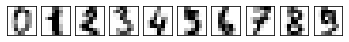

In [68]:
plot_data(digits.data[0:10,],0,16)

Nous retrouvons bien nos chiffres manuscrit en basse définition. Essayons de voir maintenant ce qu'un k-means donnerait sur ces données.

## K-means

Nous avons chargé la classe KMeans, nous pouvons donc maintenant définir une instance avec K=10 pour éviter de tomber dans un minima local nous lancerons 10 fois l'algorithme (n_init=10). Pour éxécuter l'lagorithme il suffit d'utiliser la méthode fit qui prend comme arguments les données à clusteriser.

In [69]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Nous pouvons maintenant observer les centres des clusters trouvés par l'algorithme. Ils se trouvent dans le slot cluster_centers.

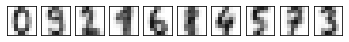

In [70]:
plot_data(kmeans.cluster_centers_,0,16)

Nous retrouvons les différents chiffre comme nous l'attendions. Ceux-ci sont permutés c'est normal, l'ordre des clusters retournés par k-emans dépend de l'initialisation de l'algorithme qui est aléatoire. Nous pouvons maintenant comparer les clusters obtenus aux "vrais" étiquettes du jeux de données pour nous faire une idée. Pour ce faire nous allons calculer la matrice de confusion (table de contingence).

In [71]:
import pandas as pd
pd.DataFrame(confusion_matrix(labels,kmeans.labels_))

,0,1,2,3,4,5,6,7,8,9
0,177,0,0,0,0,0,1,0,0,0
1,0,0,24,54,2,100,0,1,0,1
2,1,2,148,3,0,8,0,0,2,13
3,0,12,0,0,0,7,0,2,6,156
4,0,0,0,2,0,2,166,0,11,0
5,0,41,0,0,1,0,2,136,0,2
6,1,0,0,0,177,3,0,0,0,0
7,0,0,0,10,0,2,0,0,167,0
8,0,50,3,9,2,100,0,4,4,2
9,0,139,0,20,0,1,0,5,8,7


Les clusters trouvés correpondent à la structure attendu seul le cluster 5 est plus dur a attribuer puisu'il contient auttant de 1 que de 8. Nous pouvons calculer un score entre ces deux vecteur caractérisant leur "information mutuelle" ce score est compris entre 0 et 1.

In [72]:
normalized_mutual_info_score(labels,kmeans.labels_) 

/home/come/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7414775693149908

## Clustering ascendant hierarchique

Pour faire une cah avec scikit-learn il suffit de spécifier le type de critère de regroupement à utiliser et si l'on veut obtenir une classification le nombre de cluster désirés pour couper l'abre en fonction. Attention si l'on veut obtenir des etiquettes il faut utiliser la méthode fit_predict et pas seulement fit.

In [73]:
cah = AgglomerativeClustering(linkage="ward",n_clusters=10)
cah.fit(digits.data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')

Nous n'avons pas de centre pour chaque groupe comme pour le k-means d'accessible directement mais nous pouvons afficher un échantillon des membres d'un cluster le numéro 3 par exemple et calculer comme précedement la matrice de confusion et l'information mutuelle entre les résultats du clustering et les varis étiquettes.

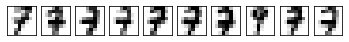

In [74]:
ex_c = digits.data[cah.labels_==3]
plot_data(ex_c[0:10,],0,16)

In [75]:
pd.DataFrame(confusion_matrix(labels,cah.labels_))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,178,0,0
1,0,0,27,0,0,0,0,0,59,96
2,0,0,166,1,10,0,0,0,0,0
3,0,169,0,1,13,0,0,0,0,0
4,0,0,0,3,0,178,0,0,0,0
5,179,2,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,180,0,0,0
7,0,0,0,179,0,0,0,0,0,0
8,0,1,4,1,165,0,0,0,1,2
9,2,145,0,11,2,0,0,0,20,0


In [76]:
normalized_mutual_info_score(labels,cah.labels_) 

/home/come/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.8682371680365814

# DB-Scan

Pour utiliser dbscan nous devons définir deux paramètres un nombre minimal de points (un niveau de densité minimal) et le rayon de la boule avec laquelle nous allons définir le voisinage. Pour nous aider à la fixer nous pouvons tracer l'histogramme des distances au 25 plus proche voisin pour un échantillon de 300 données.

In [77]:
min_samples=10
distances=pairwise_distances(digits.data[np.random.choice(digits.data.shape[0], 300, replace=False),],digits.data)
dd=np.apply_along_axis(lambda l: np.sort(l)[min_samples], 1, distances)


(array([ 2., 10., 29., 55., 58., 69., 34., 20., 17.,  6.]),
 array([12.92284798, 14.95471721, 16.98658644, 19.01845567, 21.0503249 ,
        23.08219413, 25.11406336, 27.14593259, 29.17780182, 31.20967105,
        33.24154028]),
 <a list of 10 Patch objects>)

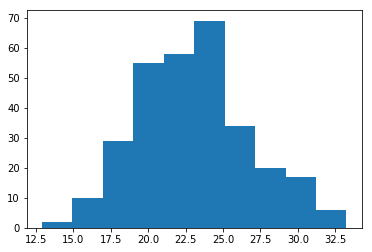

In [78]:
plt.hist(dd)

Nous observons un petit décrochement autour d'une distance de 25. Nous allons prendre cette valeur pour epsilon. Vous pouvez tester différentes valeur de min_sample et observer les changement dans le clustering

In [79]:
db = DBSCAN(eps=20,min_samples=10)
db.fit_predict(digits.data)
db.labels_

array([ 0,  6, -1, ..., -1, -1, -1])

In [80]:
pd.DataFrame(confusion_matrix(labels,db.labels_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,166,0,0,0,0,0,0,0,0,0,0,0,0,0
2,64,0,0,0,13,0,0,79,0,0,0,8,18,0,0
3,80,0,0,0,0,0,0,0,0,83,0,0,0,0,14
4,77,0,0,0,0,106,0,0,0,0,0,0,0,0,0
5,67,0,0,114,0,0,0,0,0,0,0,0,0,0,0
6,140,0,0,0,0,0,0,0,18,0,0,0,0,24,0
7,17,0,163,0,0,0,0,1,0,0,0,0,0,0,0
8,75,0,0,0,0,0,104,0,0,0,0,0,0,0,0
9,172,0,0,0,0,0,0,2,0,0,0,0,0,0,0


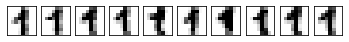

In [81]:
ex_c = digits.data[db.labels_==3]
plot_data(ex_c[0:10,],0,16)

In [82]:
normalized_mutual_info_score(labels,db.labels_) 

/home/come/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.6240340655233217

en prenant min_samples = 40 les clusters extrait sont presuqye exclusivement formés de chiffre didentiques par contre un certains nombres de données sont classés dans le bruit.

## Visualisation des résultats dans le plan de l'ACP

In [83]:
from sklearn import decomposition
from sklearn import datasets

X = digits.data
y = db.labels_

pca = decomposition.PCA(n_components=6)
pca.fit(X)
Xp = pca.transform(X)

### Projection sur la première et la deuxième composante principale

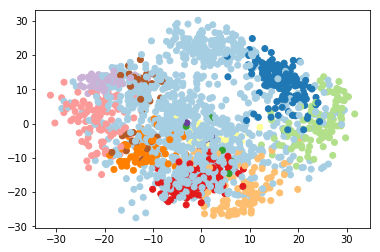

In [86]:
f=plt.scatter(Xp[:, 0], Xp[:, 1], c=y, cmap=plt.cm.Paired)

### Projection sur la première et la troisième composante principale

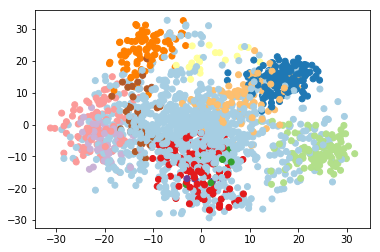

In [87]:
f=plt.scatter(Xp[:, 0], Xp[:, 2], c=y, cmap=plt.cm.Paired)

### A quoi ressemble les vecteur de projection sur les composante princiaples ?

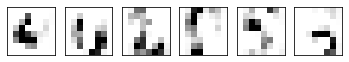

In [88]:
plot_data(pca.components_,0,0.2)

# Que faire de plus ?

## 1) Regarder les pourcentage de variance expliqué par composantes principales
reagrder les champs sockés dans l'object pca

## 2) Visualiser les résultats des k-means et cah en 10 groupes sur les 2 composantes principales
reprnedre la figure du nuage de point sur les deux composantes picinpales visualiser les résultats des algorithme de clsutering avec les couleurs

## 3) Regarder l'evolution du critère de k-means en fonction du nombre de groupe

Faire une boucle sur k et stocké la valeur du critère 'inertia_' dans un vecteur puis faire un graphique


## 4) Faire varier les différents paramètres des algorithmes et observer leur influences, rédiger quelques notes sur vos observations